In [4]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import tilemapbase as tmb

from utils.ubx import filter_ubx_event
from utils.streams import Dataset
from utils.EmotionalCitiesStreams import Stream
import utils.processing

%matplotlib inline
plt.style.use('ggplot')


g:\anaconda3\envs\ecities\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [39]:
stream_root_folder = r"G:\EmotionalCitiesDatasets\Outedoor2022_10_13_10_33_33"
dataset = Dataset(stream_root_folder, datasetlabel='Outedoor2022_10_13_10_33_33')
dataset.import_streams()
#dataset.add_georeference()



In [38]:

NavData = dataset.streams.UBX.filter_event(event='NAV-HPPOSLLH')

NavData.insert(NavData.shape[1], "Lat", NavData.apply(lambda x : x.Message.lat, axis = 1), False)
		# NavData.insert(NavData.shape[1], "Lon", NavData.apply(lambda x : x.Message.lon, axis = 1), False)
		# NavData.insert(NavData.shape[1], "Height", NavData.apply(lambda x : x.Message.height, axis = 1), False)
		# NavData.insert(NavData.shape[1], "Time", NavData.apply(lambda x : x.Message.iTOW, axis = 1), False)
NavData

Message  \
Seconds                                                                         
1904-01-01 00:03:59.724992  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:04:00.722976  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:04:01.728000  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:04:02.724992  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:04:03.724000  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
...                                                                       ...   
1904-01-01 00:27:31.726976  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:27:32.725984  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:27:33.726976  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:27:34.728000  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   
1904-01-01 00:27:35.725984  <UBX(NAV-HPPOSLLH, version=0, reserved0=0, inv...   

                                Identity Class        Id  Length        Lat  
Seconds                                                                      
1904-01-01 00:03:59.724992  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.130186  
1904-01-01 00:04:00.722976  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.130186  
1904-01-01 00:04:01.728000  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.130187  
1904-01-01 00:04:02.724992  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.130187  
1904-01-01 00:04:03.724000  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.130188  
...                                  ...   ...       ...     ...        ...  
1904-01-01 00:27:31.726976  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.132579  
1904-01-01 00:27:32.725984  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.132579  
1904-01-01 00:27:33.726976  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.132580  
1904-01-01 00:27:34.728000  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.132580  
1904-01-01 00:27:35.725984  NAV-HPPOSLLH   NAV  HPPOSLLH      36  48.132580  

[1417 rows x 6 columns]

                               Value      Lat
Seconds                                      
1904-01-01 00:03:59.556992 -11559343  54554.0
1904-01-01 00:04:00.482976 -11559350      NaN
1904-01-01 00:04:01.476000 -11559356      NaN
1904-01-01 00:04:02.468000 -11559366      NaN
1904-01-01 00:04:03.460000 -11559373      NaN
...                              ...      ...
1904-01-01 00:27:31.108000 -11565176      NaN
1904-01-01 00:27:32.100992 -11565178      NaN
1904-01-01 00:27:33.092992 -11565180      NaN
1904-01-01 00:27:34.084992 -11565178      NaN
1904-01-01 00:27:35.077984 -11565178      NaN

[1427 rows x 2 columns]


(1427, 1)

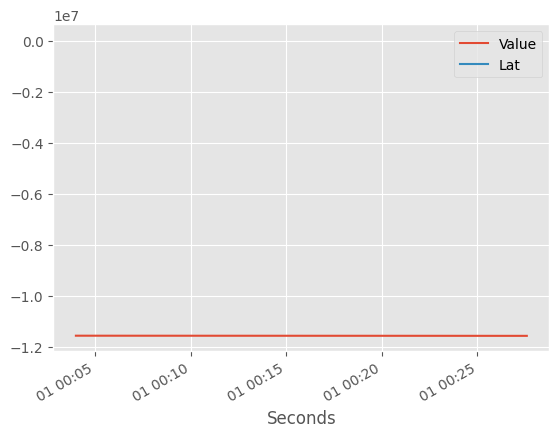

In [53]:
#nav_data.drop()
teste = dataset.streams.TK.GPS.Longitude.data.copy()
result=pd.concat([dataset.streams.TK.GPS.Latitude.data,dataset.streams.TK.GPS.Longitude.data,dataset.streams.TK.GPS.Altitude.data],axis=1,ignore_index=True)
# teste.insert(teste.shape[1], "Lat", dataset.streams.TK.GPS.Altitude.data, False)
# teste.plot()
print(result)
#dataset.streams.TK.GPS.Latitude.data
#dataset.streams.TK.GPS.Altitude.data.shape

In [7]:
resampled = Stream.resample_temporospatial(input_data = dataset.streams.TK.Humidity.Humidity.data,
                                           georeference=dataset.georeference)


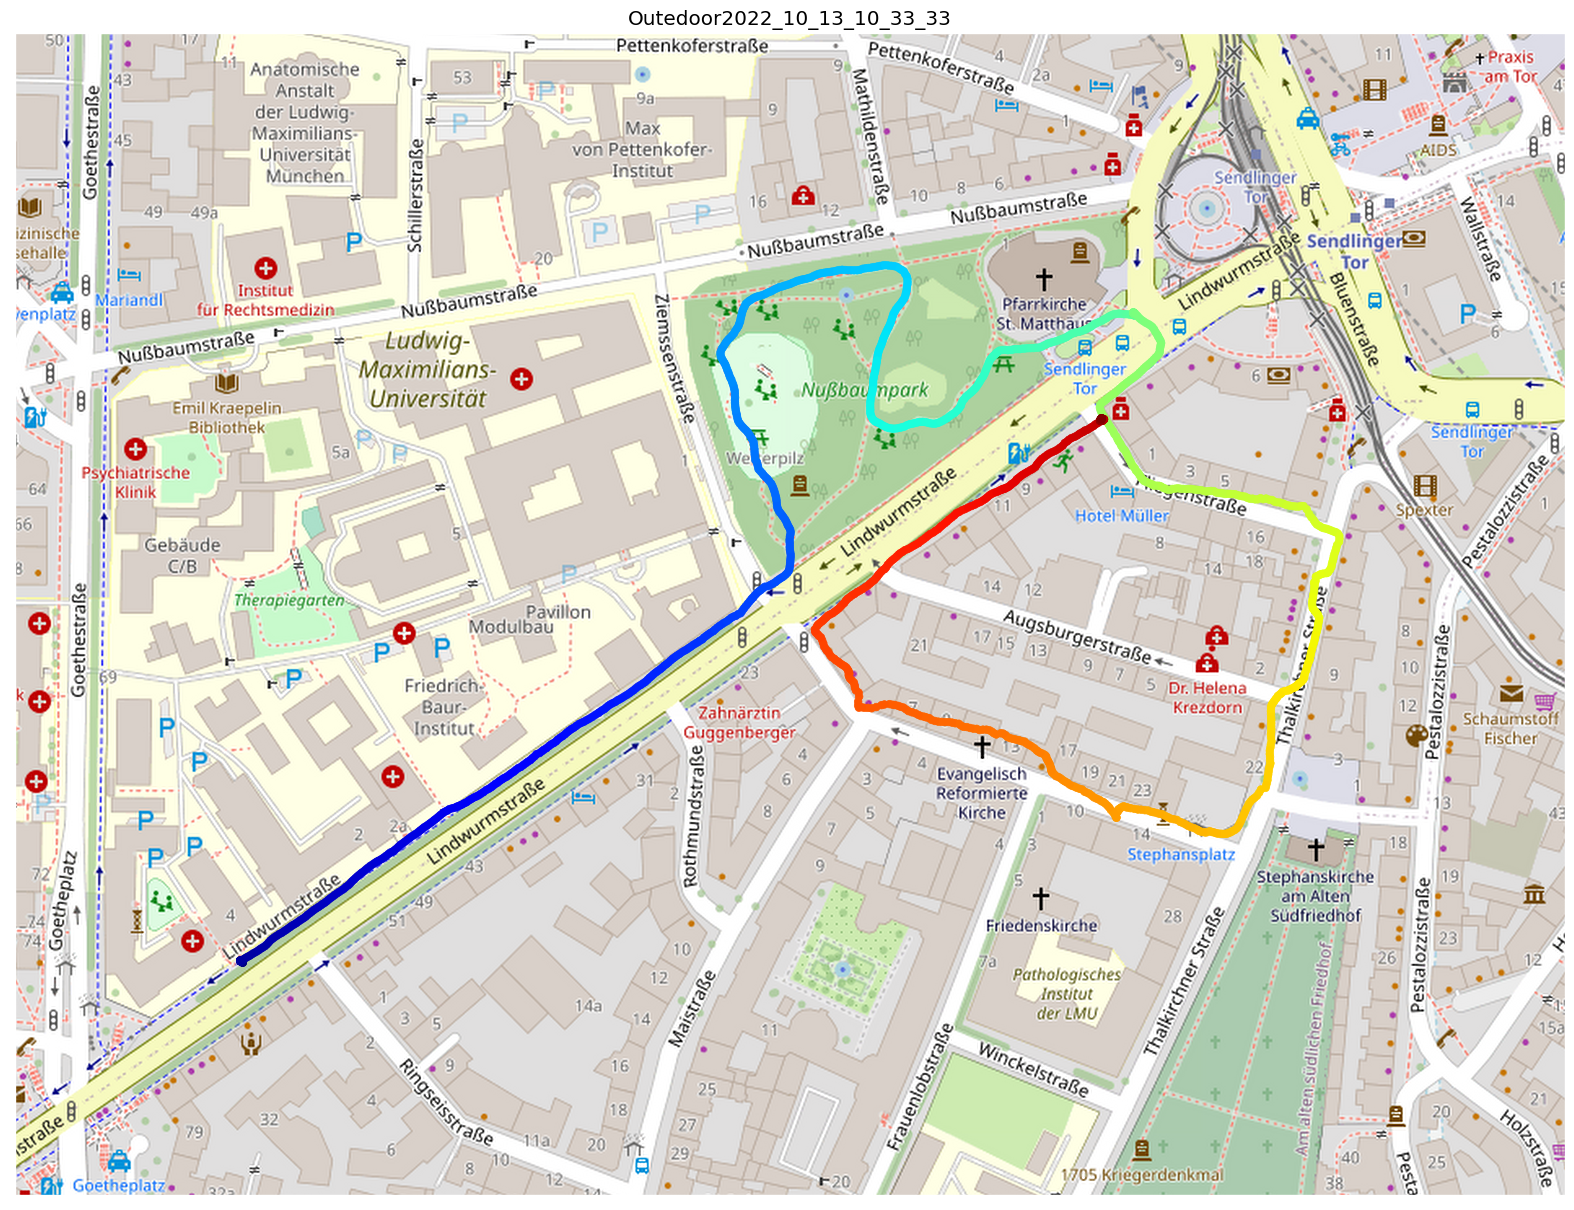

In [8]:
tiles = tmb.tiles.Stamen_Watercolour

fig = dataset.showmap(colorscale_override=dataset.georeference.index,
                      cmap = "jet",
                      markersize= 30
                      )
ax = fig.gca()
ax.set_title(dataset.datasetlabel)
fig.get_children()
#fig.savefig(r"C:\Users\neurogears\Desktop\map.png")
plt.show()



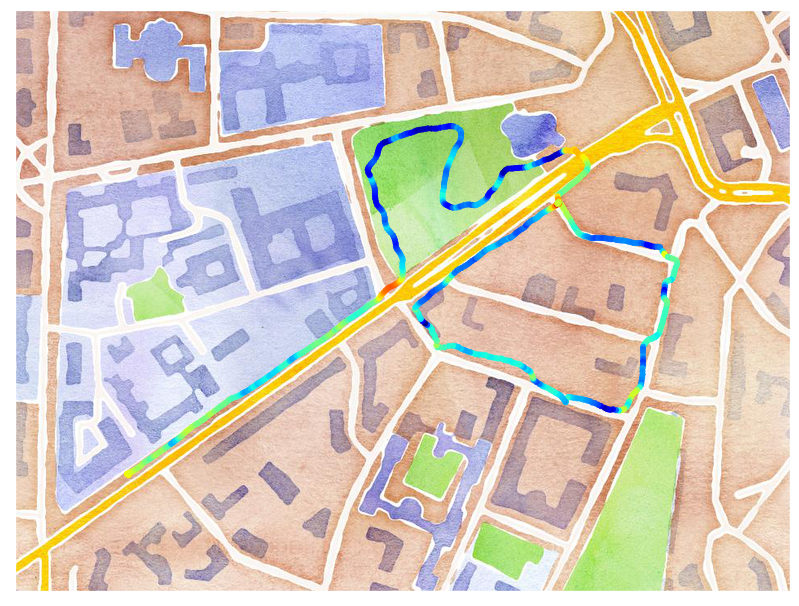

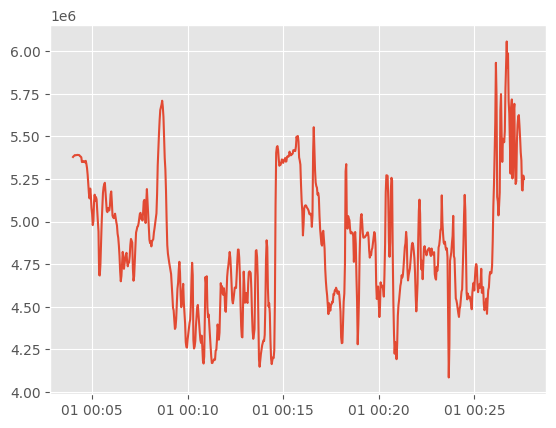

Lat        Lon     Height          Data
Seconds                                                                  
1904-01-01 00:03:59.724992  48.130186  11.559536  579149.10  5.379146e+06
1904-01-01 00:04:01.724992  48.130187  11.559534  578774.30  5.383847e+06
1904-01-01 00:04:03.724992  48.130189  11.559532  578365.10  5.386966e+06
1904-01-01 00:04:05.724992  48.130189  11.559532  578621.45  5.390277e+06
1904-01-01 00:04:07.724992  48.130190  11.559531  578608.65  5.389021e+06
...                               ...        ...        ...           ...
1904-01-01 00:27:27.724992  48.132577  11.565192  572177.25  5.359060e+06
1904-01-01 00:27:29.724992  48.132578  11.565192  572112.45  5.185740e+06
1904-01-01 00:27:31.724992  48.132579  11.565194  572075.60  5.182223e+06
1904-01-01 00:27:33.724992  48.132580  11.565194  571964.10  5.269665e+06
1904-01-01 00:27:35.724992  48.132580  11.565195  571882.60  5.248969e+06

[709 rows x 4 columns]

In [16]:
resampled = Stream.resample_temporospatial(input_data = dataset.streams.TK.Dual0_20mA.SolarLight.data,
                                           georeference=dataset.georeference)

fig = dataset.showmap(NavData=resampled, figsize=(10,10), tiles= tiles)
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()
resampled

In [13]:
resampled = Stream.resample_temporospatial(input_data = dataset.streams.m,
                                           georeference=dataset.georeference)

fig = dataset.showmap(NavData=resampled, figsize=(10,10), tiles= tiles)
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


AttributeError: 'NoneType' object has no attribute 'E4_Gsr'

In [54]:
def resample_temporospatial_circ(input_data, georeference,
                sampling_dt = datetime.timedelta(seconds = 2)):

    resampled = georeference.loc[:,"Lat":"Height"].resample(sampling_dt, origin='start').mean()
    resampled['Data'] = np.NAN
    for i in np.arange(len(resampled)-1):
        resampled['Data'].iloc[i] = circular_mean((input_data[
            (input_data.index >= resampled.index[i]) &
            (input_data.index < resampled.index[i+1])]))
    resampled['Data'].iloc[i+1] = circular_mean(input_data[input_data.index >= resampled.index[i+1]])
    return resampled

from scipy.stats import circmean
def circular_mean(x):
    return round(np.rad2deg(circmean(np.deg2rad(x))),2)

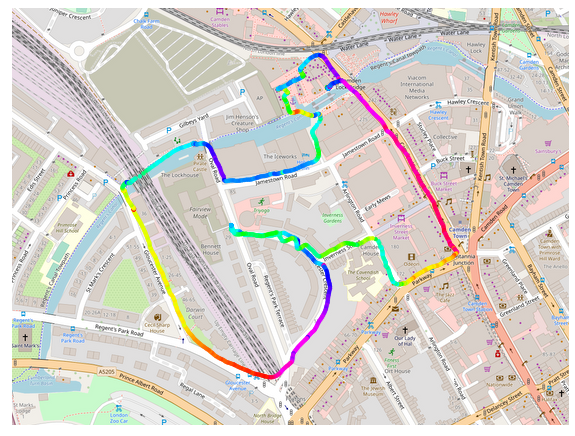

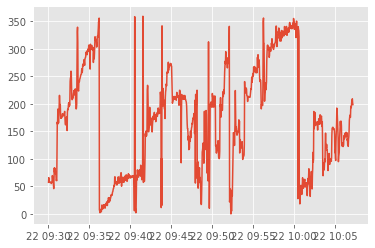

In [55]:

resampled = resample_temporospatial_circ(input_data = dataset.streams.Accelerometer.data['Orientation.X'],
                                           georeference=dataset.georeference)

fig = dataset.showmap(NavData=resampled, figsize=(10,10), cmap = 'hsv')
plt.show()
plt.figure
plt.plot(resampled.Data)
plt.show()


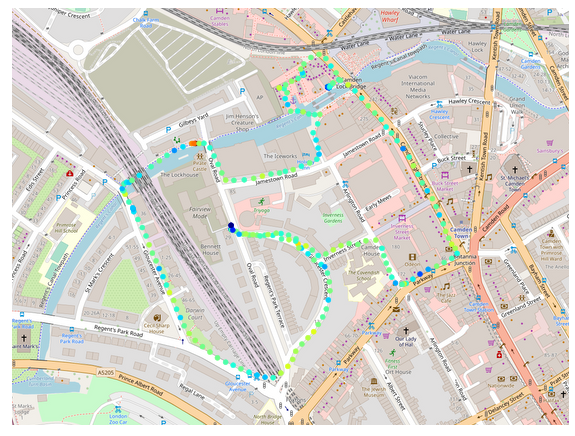

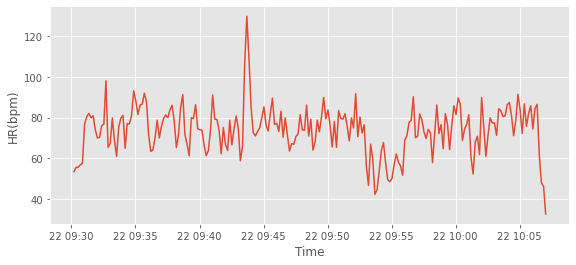

In [16]:
hr = utils.processing.heartrate_from_ecg(dataset.streams.BioData.ECG,
                                         fs = 250, max_heartrate_bpm = 250.0,
                                        peak_height = 800, smooth_win = 10)
resampled = Stream.resample_temporospatial(input_data = hr,
                                           georeference=dataset.georeference,
                                           sampling_dt = datetime.timedelta(seconds = 10))
fig = dataset.showmap(NavData=resampled, figsize=(10,10), cmap = 'jet', markersize = 25 )
plt.show()
plt.figure(figsize= (9.3,4))
plt.plot(resampled.Data)
plt.xlabel('Time')
plt.ylabel('HR(bpm)')
plt.show()


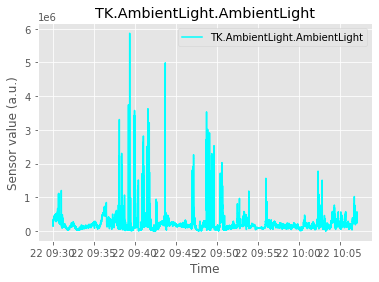

In [3]:
#dataset.streams.TK.AmbientLight.AmbientLight.load()
dataset.streams.TK.AmbientLight.AmbientLight.plot(color = "cyan")
plt.legend()